## D. 데이터 분석 - 2021년 이후 월별 평균 종가 출력하기

csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.

월 별로 그룹화하여 평균 종가를 계산한 새로운 DataFrame 을 만들어 그래프로 시각화


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
csv_path = "netflix_data/NFLX.csv"

df = pd.read_csv(csv_path, usecols = range(0,5))

df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [58]:
df_after_2021 = df[df["Date"] >= "2021-01-01"]

df_after_2021['Date'] = pd.to_datetime(df_after_2021['Date'])

df_after_2021

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_10708\2391772418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2021['Date'] = pd.to_datetime(df_after_2021['Date'])


,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [59]:
df_after_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 733 to 1008
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    276 non-null    datetime64[ns]
 1   Open    276 non-null    float64       
 2   High    276 non-null    float64       
 3   Low     276 non-null    float64       
 4   Close   276 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 12.9 KB


In [66]:
df_after_2021['month'] = df_after_2021['Date'].dt.month
df_after_2021['year'] = df_after_2021['Date'].dt.year
df_after_2021

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_10708\3461134424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2021['month'] = df_after_2021['Date'].dt.month
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_10708\3461134424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2021['year'] = df_after_2021['Date'].dt.year


,Date,Open,High,Low,Close,month,year
733,2021-01-04,539.000000,540.799988,515.090027,522.859985,1,2021
734,2021-01-05,521.549988,526.780029,515.890015,520.799988,1,2021
735,2021-01-06,511.970001,513.099976,499.500000,500.489990,1,2021
736,2021-01-07,508.279999,516.440002,506.420013,508.890015,1,2021
737,2021-01-08,511.309998,513.239990,504.510010,510.399994,1,2021
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,1,2022
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,2,2022
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,2,2022
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,2,2022


In [70]:
new_df = df_after_2021.groupby(by=['year','month']).mean()

new_df

Date        Open        High         Low  \
year month                                                                     
2021 1     2021-01-16 10:06:18.947368448  530.531051  537.838944  519.854214   
     2     2021-02-13 10:06:18.947368448  547.777366  555.494205  540.621576   
     3     2021-03-15 15:39:07.826086912  519.429134  527.057390  511.326090   
     4     2021-04-16 17:08:34.285714176  532.810952  537.802858  527.041430   
     5     2021-05-15 12:00:00.000000000  496.923996  502.062502  491.996503   
     6     2021-06-15 07:38:10.909090816  503.470914  508.116364  498.675455   
     7     2021-07-16 13:42:51.428571392  528.609045  534.298567  522.618091   
     8     2021-08-15 22:54:32.727272704  529.884541  535.937267  526.222275   
     9     2021-09-16 03:25:42.857142784  589.405233  598.170003  583.384760   
     10    2021-10-15 18:17:08.571428608  639.220474  648.829043  632.430001   
     11    2021-11-14 11:25:42.857142784  671.363334  677.726188  660.947617   
     12    2021-12-16 00:00:00.000000000  611.568640  616.962727  601.954548   
2022 1     2022-01-16 04:48:00.000000000  492.055000  498.946999  478.276000   
     2     2022-02-02 12:00:00.000000000  427.489998  438.122505  413.235008   

                 Close  
year month              
2021 1      526.816845  
     2      548.959999  
     3      518.123482  
     4      533.136662  
     5      496.714497  
     6      503.324091  
     7      528.653330  
     8      532.346817  
     9      590.795239  
     10     642.202849  
     11     667.524286  
     12     608.484089  
2022 1      487.853500  
     2      425.595009

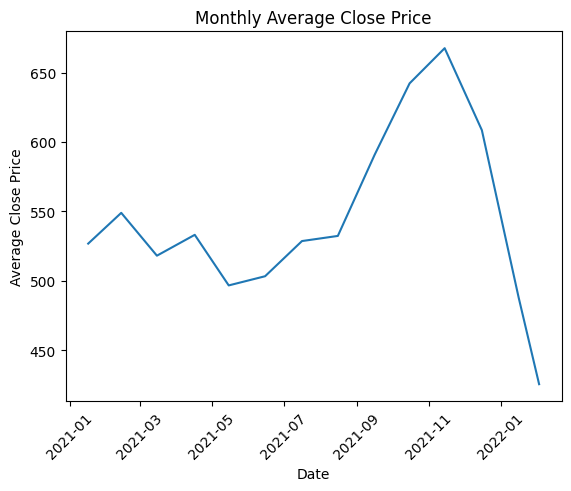

In [72]:
plt.plot(new_df['Date'],new_df['Close'])

plt.title("Monthly Average Close Price")

plt.xlabel('Date')

plt.ylabel('Average Close Price')

plt.xticks(rotation=45)

plt.show()